0         63.0
1         51.0
2         72.0
3         64.0
4         58.0
         ...  
44635     53.0
44636     74.0
44637    106.0
44638     92.0
44639     85.0
Name: 0, Length: 44640, dtype: float64


<AxesSubplot:>

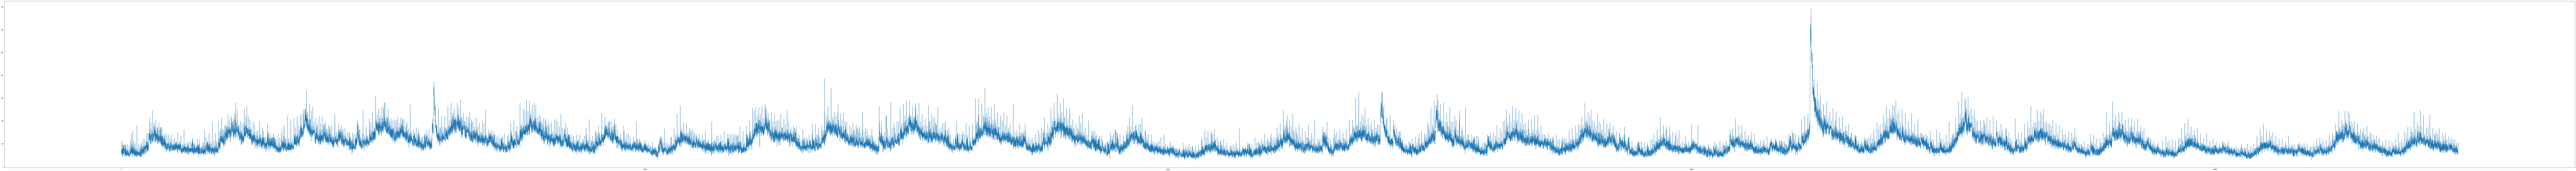

In [1]:
import statsmodels.api as sm      # 时序分解
from sklearn.preprocessing import MinMaxScaler # 数据归一化
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

from algorithm_2 import algorithm_2
# 导入数据 共一列数据, 默认索引
RATE = 0.75      # 训练集，测试集比例
N_timestamp=60   # 每60个数据预测下一个
X_dim = 1        # 原始数据


data = pd.read_csv('data_fillna.csv', usecols=['0'], squeeze=True)
print(data)
plt.figure(figsize=(300, 20))
data.plot()

In [2]:
# 数据集分组
datas = []

#分组个数
num_data_set = 10

length = int(len(data)/num_data_set)
for i in range(num_data_set - 1):
    datas.append(np.array(data[i*length:(i+1)*length]))
datas.append(data[(num_data_set - 1)*length:])
datas = np.array(datas)
print(datas)


[[ 63.  51.  72. ...  81.  84.  76.]
 [102. 116.  70. ...  70.  84.  74.]
 [ 91.  66.  63. ... 111. 105. 103.]
 ...
 [ 56.  69.  60. ... 115. 110.  87.]
 [132. 124. 117. ...  73.  74.  62.]
 [ 83.  64.  64. ... 106.  92.  85.]]


In [3]:


def data_split(sequence, n_timestamp):   #
    # 取前 n_timestamp 天的数据为 X；n_timestamp+1天数据为 Y。
    X = []
    y = []

    for i in range(len(sequence)):
        end_ix = i + n_timestamp

        if end_ix > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix,0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [4]:



def get_train_test(data, rate=RATE):

    data = np.array(data).reshape(-1,X_dim)
    train_set = data[:int(len(data)*rate)]
    test_set = data[int(len(data)*rate):]
    #数据归一化处理
    sc = MinMaxScaler(feature_range=(0, 1))
    train_set_scaled = sc.fit_transform(train_set)
    test_set_scaled  = sc.transform(test_set)

    #训练集输入输出
    X_train, y_train = data_split(train_set_scaled,N_timestamp)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_dim)
    X_test, y_test = data_split(test_set_scaled,N_timestamp)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_dim)

    return sc, X_train, y_train, X_test, y_test


In [5]:
sc, X_train,y_train,X_test,y_test = get_train_test(datas[i], rate=0.75)
al2_1 = algorithm_2()

TypeError: algorithm_2() missing 8 required positional arguments: 'train_old', 'train_new', 'label_old', 'label_new', 'S_test', 'weak_learner', 'N', and 'predict'